In [1]:
%matplotlib inline

import glob, re, json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def get_row(file):
    with open(file, 'r') as f:
        return json.loads(f.readline())

In [3]:
def float_formatter(x): return '{:.2f}'.format(x)

def generate_table(algorithm, extraction, similarity, components):

    file_glob = 'data/classification/class-' + algorithm + '-' + \
                extraction + '-' + similarity + '-' + components + '.json'

    start = file_glob.index('*')
    end = len(file_glob) - start - 1

    index = [f[start:-end].replace('_', ' ') for f in glob.glob(file_glob)]
    data = [get_row(f) for f in glob.glob(file_glob)]

    res = pd.DataFrame(data, index=index)
    res = res.drop(['train_mean', 'train_median', 'train_std'], axis=1)
    res.columns = [r'$\alpha$', 'Test mean', 'Test median', 'Test std']
    #return res.style.format(float_formatter)
    return res

In [4]:
t = generate_table('*', 'pca', 'jaccard', '2')
t.style.format(float_formatter)

,$\alpha$,Test mean,Test median,Test std
MLP,0.20,0.83,0.83,0.03
SVC (linear),0.90,0.60,0.60,0.00
Decision tree,0.80,0.71,0.65,0.12
Naive Bayes,0.90,0.83,0.82,0.01
Random forest,0.80,0.84,0.84,0.02
SVC (gaussian),0.90,0.60,0.60,0.00
LDA,0.90,0.82,0.82,0.02


In [5]:
regex = re.compile(r'(\d+).(\d\d)\d*')
print(regex.sub(r'\1.\2', t.to_latex()))

\begin{tabular}{lrrrr}
\toprule
{} &  \$\textbackslash alpha\$ &  Test mean &  Test median &  Test std \\
\midrule
MLP            &       0.2 &   0.83 &     0.82 &  0.02 \\
SVC (linear)   &       0.9 &   0.60 &     0.60 &  0.00 \\
Decision tree  &       0.8 &   0.71 &     0.64 &  0.12 \\
Naive Bayes    &       0.9 &   0.82 &     0.82 &  0.00 \\
Random forest  &       0.8 &   0.84 &     0.83 &  0.01 \\
SVC (gaussian) &       0.9 &   0.60 &     0.60 &  0.00 \\
LDA            &       0.9 &   0.82 &     0.82 &  0.01 \\
\bottomrule
\end{tabular}



In [6]:
file_glob = 'data/classification/class-*-pca-jaccard-2.json'
start = file_glob.index('*')
end = len(file_glob) - start - 1

In [7]:
p = re.compile('^.*-(.*)-(.*)-(.*)-(.*).json')

algs = set()
extrs = set()
sims = set()
comps = set()
for f in glob.glob('data/classification/class-*.json'):
    m = p.match(f)
    algs.add(m.group(1))
    extrs.add(m.group(2))
    sims.add(m.group(3))
    comps.add(m.group(4))
    

In [8]:
def get_comparison_table(dim, extraction, exclude=[]):

    rows = []
    alg_index = []

    for alg in algs:
        alg_index.append(alg)
        row = {}
        for sim in set(sims).difference(exclude):
            file = 'data/classification/class-' + \
                   alg + '-' + extraction + '-' + \
                   sim + '-' + str(dim) + '.json'
            try:
                with open(file, 'r') as in_file:
                    row[sim] = json.loads(in_file.readline())['test_median']
            except FileNotFoundError:
                row[sim] = np.nan
        rows.append(row)
    res = pd.DataFrame(rows, index=alg_index)
    return res

In [9]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

In [10]:
res = {'pca': {}, 'tsne': {}}

In [11]:
res['pca']['2'] = get_comparison_table(2, 'pca')
res['pca']['2'].index.name = 'PCA-2'
res['pca']['2'].style.apply(highlight_max, axis=1).format(float_formatter)

,hamming,length,levenshtein,jaccard
PCA-2,,,,
Random_forest,0.67,0.57,0.68,0.84
LDA,0.52,0.60,0.69,0.82
MLP,0.63,0.60,0.67,0.83
SVC_(linear),0.60,0.60,0.60,0.60
Naive_Bayes,0.62,0.60,0.70,0.82
Decision_tree,0.62,0.58,0.68,0.65
SVC_(gaussian),0.60,0.60,0.60,0.60


In [12]:
res['pca']['3'] = get_comparison_table(3, 'pca')
res['pca']['3'].index.name = 'PCA-3'
res['pca']['3'].style.apply(highlight_max, axis=1).format(float_formatter)

,hamming,length,levenshtein,jaccard
PCA-3,,,,
Random_forest,0.66,0.58,0.70,0.82
LDA,0.53,0.60,0.68,0.82
MLP,0.61,0.60,0.69,0.83
SVC_(linear),0.60,0.60,0.60,0.60
Naive_Bayes,0.63,0.60,0.69,0.81
Decision_tree,0.63,0.57,0.66,0.60
SVC_(gaussian),0.60,0.60,0.60,0.60


In [13]:
res['pca']['5'] = get_comparison_table(5, 'pca')
res['pca']['5'].index.name = 'PCA-5'
res['pca']['5'].style.apply(highlight_max, axis=1).format(float_formatter)

,hamming,length,levenshtein,jaccard
PCA-5,,,,
Random_forest,0.66,0.57,0.68,0.83
LDA,0.53,0.60,0.69,0.83
MLP,0.63,0.60,0.68,0.81
SVC_(linear),0.60,0.60,0.60,0.60
Naive_Bayes,0.64,0.60,0.68,0.83
Decision_tree,0.63,0.59,0.66,0.60
SVC_(gaussian),0.60,0.60,0.60,0.60


In [14]:
res['pca']['10'] = get_comparison_table(10, 'pca')
res['pca']['10'].index.name = 'PCA-10'
res['pca']['10'].style.apply(highlight_max, axis=1).format(float_formatter)

,hamming,length,levenshtein,jaccard
PCA-10,,,,
Random_forest,0.65,0.58,0.68,0.82
LDA,0.53,0.60,0.68,0.84
MLP,0.61,0.59,0.68,0.82
SVC_(linear),0.60,0.60,0.60,0.60
Naive_Bayes,0.63,0.60,0.68,0.82
Decision_tree,0.63,0.58,0.66,0.65
SVC_(gaussian),0.60,0.60,0.60,0.60


In [15]:
res['pca']['30'] = get_comparison_table(30, 'pca')
res['pca']['30'].index.name = 'PCA-30'
res['pca']['30'].style.apply(highlight_max, axis=1).format(float_formatter)

,hamming,length,levenshtein,jaccard
PCA-30,,,,
Random_forest,0.67,0.60,0.68,0.82
LDA,0.54,0.60,0.68,0.83
MLP,0.63,0.60,0.66,0.81
SVC_(linear),0.60,0.60,0.60,0.60
Naive_Bayes,0.63,0.60,0.69,0.84
Decision_tree,0.63,0.59,0.69,0.68
SVC_(gaussian),0.60,0.60,0.60,0.60


In [16]:
pca_comp = pd.concat([get_comparison_table(d, 'pca', exclude=['length']) for d in (2, 3, 5, 10)],
                     axis=1)
pca_comp

,hamming,levenshtein,jaccard,hamming,levenshtein,jaccard,hamming,levenshtein,jaccard,hamming,levenshtein,jaccard
Random_forest,0.673575,0.678756,0.839378,0.663212,0.704663,0.818653,0.663212,0.683938,0.829016,0.647668,0.683938,0.818653
LDA,0.522491,0.688581,0.820069,0.529412,0.678201,0.820069,0.525952,0.685121,0.830450,0.532872,0.681661,0.837370
MLP,0.627586,0.668966,0.827586,0.613793,0.689655,0.834483,0.634483,0.682759,0.806897,0.613793,0.682759,0.820690
SVC_(linear),0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000
Naive_Bayes,0.622837,0.698962,0.823529,0.633218,0.688581,0.809689,0.636678,0.681661,0.830450,0.626298,0.681661,0.816609
Decision_tree,0.620690,0.682759,0.648276,0.627586,0.662069,0.600000,0.627586,0.662069,0.600000,0.627586,0.662069,0.648276
SVC_(gaussian),0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000


In [17]:
print(regex.sub(r'\1.\2', pca_comp.to_latex()))

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &   hamming &  levenshtein &   jaccard &   hamming &  levenshtein &   jaccard &   hamming &  levenshtein &   jaccard &   hamming &  levenshtein &   jaccard \\
\midrule
Random\_forest  &  0.67 &     0.67 &  0.83 &  0.66 &     0.70 &  0.81 &  0.66 &     0.68 &  0.82 &  0.64 &     0.68 &  0.81 \\
LDA            &  0.52 &     0.68 &  0.82 &  0.52 &     0.67 &  0.82 &  0.52 &     0.68 &  0.83 &  0.53 &     0.68 &  0.83 \\
MLP            &  0.62 &     0.66 &  0.82 &  0.61 &     0.68 &  0.83 &  0.63 &     0.68 &  0.80 &  0.61 &     0.68 &  0.82 \\
SVC\_(linear)   &  0.60 &     0.60 &  0.60 &  0.60 &     0.60 &  0.60 &  0.60 &     0.60 &  0.60 &  0.60 &     0.60 &  0.60 \\
Naive\_Bayes    &  0.62 &     0.69 &  0.82 &  0.63 &     0.68 &  0.80 &  0.63 &     0.68 &  0.83 &  0.62 &     0.68 &  0.81 \\
Decision\_tree  &  0.62 &     0.68 &  0.64 &  0.62 &     0.66 &  0.60 &  0.62 &     0.66 &  0.60 &  0.62 &     0.66 &  0.64 \\
SVC\_(gaussian) &  0.60 &    

In [18]:
res['tsne']['2'] = get_comparison_table(2, 'tsne')
res['tsne']['2'].index.name = 'tSNE-2'
res['tsne']['2'].style.apply(highlight_max, axis=1).format(float_formatter)

,hamming,length,levenshtein,jaccard
tSNE-2,,,,
Random_forest,0.65,0.54,0.65,0.66
LDA,0.68,0.60,0.63,0.65
MLP,0.70,0.60,0.63,0.67
SVC_(linear),0.60,0.60,0.60,0.60
Naive_Bayes,0.69,0.60,0.63,0.65
Decision_tree,0.67,0.53,0.63,0.63
SVC_(gaussian),0.60,0.60,0.60,0.60


In [19]:
res['tsne']['3'] = get_comparison_table(3, 'tsne')
res['tsne']['3'].index.name = 'tSNE-3'
res['tsne']['3'].style.apply(highlight_max, axis=1).format(float_formatter)

,hamming,length,levenshtein,jaccard
tSNE-3,,,,
Random_forest,0.66,0.54,0.66,0.65
LDA,0.68,0.60,0.62,0.69
MLP,0.69,0.60,0.61,0.61
SVC_(linear),0.60,0.60,0.60,0.60
Naive_Bayes,0.70,0.60,0.64,0.66
Decision_tree,0.66,0.51,0.60,0.63
SVC_(gaussian),0.60,0.60,0.60,0.60


In [20]:
res['tsne']['5'] = get_comparison_table(5, 'tsne')
res['tsne']['5'].index.name = 'tSNE-5'
res['tsne']['5'].style.apply(highlight_max, axis=1).format(float_formatter)

,hamming,length,levenshtein,jaccard
tSNE-5,,,,
Random_forest,0.66,0.55,0.66,0.63
LDA,0.69,0.60,0.63,0.67
MLP,0.65,0.59,0.61,0.58
SVC_(linear),0.60,0.60,0.60,0.60
Naive_Bayes,0.65,0.60,0.65,0.65
Decision_tree,0.66,0.53,0.61,0.63
SVC_(gaussian),0.60,0.60,0.60,0.60


In [21]:
res['tsne']['10'] = get_comparison_table(10, 'tsne')
res['tsne']['10'].index.name = 'tSNE-10'
res['tsne']['10'].style.apply(highlight_max, axis=1).format(float_formatter)

,hamming,length,levenshtein,jaccard
tSNE-10,,,,
Random_forest,0.67,0.53,0.67,0.67
LDA,0.70,0.60,0.63,0.69
MLP,0.68,0.60,0.61,0.59
SVC_(linear),0.60,0.60,0.60,0.60
Naive_Bayes,0.68,0.60,0.63,0.66
Decision_tree,0.68,0.53,0.60,0.61
SVC_(gaussian),0.60,0.60,0.60,0.60


In [22]:
res['tsne']['30'] = get_comparison_table(30, 'tsne')
res['tsne']['30'].index.name = 'tSNE-30'
res['tsne']['30'].style.apply(highlight_max, axis=1).format(float_formatter)

,hamming,length,levenshtein,jaccard
tSNE-30,,,,
Random_forest,0.67,0.55,0.66,0.63
LDA,0.67,0.60,0.64,0.67
MLP,0.65,0.59,0.61,0.60
SVC_(linear),0.60,0.60,0.60,0.60
Naive_Bayes,0.68,0.60,0.60,0.65
Decision_tree,0.63,0.50,0.63,0.63
SVC_(gaussian),0.60,0.60,0.60,0.60


In [23]:
tsne_comp = pd.concat([get_comparison_table(d, 'tsne', exclude=['length']) for d in (2, 3, 5, 10)],
                      axis=1)
tsne_comp

,hamming,levenshtein,jaccard,hamming,levenshtein,jaccard,hamming,levenshtein,jaccard,hamming,levenshtein,jaccard
Random_forest,0.647668,0.652850,0.663212,0.663212,0.663212,0.647668,0.658031,0.658031,0.632124,0.668394,0.668394,0.668394
LDA,0.678201,0.629758,0.650519,0.681661,0.622837,0.688581,0.688581,0.626298,0.674740,0.702422,0.629758,0.688581
MLP,0.703448,0.634483,0.668966,0.689655,0.613793,0.606897,0.648276,0.613793,0.579310,0.682759,0.606897,0.586207
SVC_(linear),0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000
Naive_Bayes,0.692042,0.633218,0.650519,0.698962,0.643599,0.664360,0.650519,0.650519,0.650519,0.678201,0.629758,0.657439
Decision_tree,0.668966,0.627586,0.627586,0.655172,0.600000,0.627586,0.655172,0.606897,0.627586,0.675862,0.600000,0.613793
SVC_(gaussian),0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000


In [24]:
print(regex.sub(r'\1.\2', tsne_comp.to_latex()))

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &   hamming &  levenshtein &   jaccard &   hamming &  levenshtein &   jaccard &   hamming &  levenshtein &   jaccard &   hamming &  levenshtein &   jaccard \\
\midrule
Random\_forest  &  0.64 &     0.65 &  0.66 &  0.66 &     0.66 &  0.64 &  0.65 &     0.65 &  0.63 &  0.66 &     0.66 &  0.66 \\
LDA            &  0.67 &     0.62 &  0.65 &  0.68 &     0.62 &  0.68 &  0.68 &     0.62 &  0.67 &  0.70 &     0.62 &  0.68 \\
MLP            &  0.70 &     0.63 &  0.66 &  0.68 &     0.61 &  0.60 &  0.64 &     0.61 &  0.57 &  0.68 &     0.60 &  0.58 \\
SVC\_(linear)   &  0.60 &     0.60 &  0.60 &  0.60 &     0.60 &  0.60 &  0.60 &     0.60 &  0.60 &  0.60 &     0.60 &  0.60 \\
Naive\_Bayes    &  0.69 &     0.63 &  0.65 &  0.69 &     0.64 &  0.66 &  0.65 &     0.65 &  0.65 &  0.67 &     0.62 &  0.65 \\
Decision\_tree  &  0.66 &     0.62 &  0.62 &  0.65 &     0.60 &  0.62 &  0.65 &     0.60 &  0.62 &  0.67 &     0.60 &  0.61 \\
SVC\_(gaussian) &  0.60 &    

In [25]:
cs = [int(d) for d in comps]
cs.sort()

def get_trajectory(extraction, algorithm, similarity):
    accs = [res[extraction][str(d)].at[algorithm, similarity] for d in cs]
    return accs

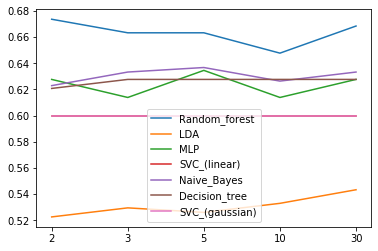

In [26]:
for alg in algs:
    plt.plot(range(len(cs)), get_trajectory('pca', alg, 'hamming'), label=alg)

plt.xticks(range(len(cs)), cs)
plt.legend()
plt.show()

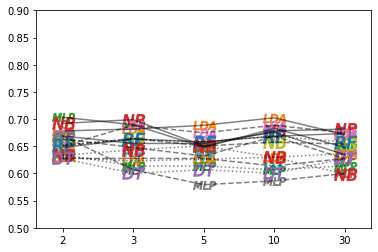

In [27]:
import itertools as it

to_symbol = {'Decision_tree': 'DT', 'LDA': 'LDA', 'MLP': 'MLP', 'Naive_Bayes': 'NB', 'Random_forest': 'RF'}

def compare_trajectories(extr_set, alg_set, sim_set, **style):
    confs = it.product(extr_set, alg_set, sim_set)

    for extr, alg, sim in confs:
        plt.plot(range(len(cs)), get_trajectory(extr, alg, sim), 'k', **style)
        plt.scatter(range(len(cs)), get_trajectory(extr, alg, sim),
                    marker=r'${}$'.format(to_symbol[alg]), s=500)
        

    plt.xticks(range(len(cs)), cs)
    return plt

ret_algs = {'Decision_tree', 'LDA', 'MLP', 'Naive_Bayes', 'Random_forest'}


compare_trajectories(['tsne'], ret_algs, ['hamming'],
                     alpha=.5)
compare_trajectories(['tsne'], ret_algs, ['jaccard'],
                     linestyle='--', alpha=.5)
compare_trajectories(['tsne'], ret_algs, ['levenshtein'],
                     linestyle=':', alpha=.5)
plt.ylim(0.5, 0.9)
plt.show()

In [28]:
def trajectories_to_lists(extr_set, alg_set, sim_set):
    confs = it.product(extr_set, alg_set, sim_set)

    result = []
    names = []
    for extr, alg, sim in confs:
        result.append(get_trajectory(extr, alg, sim))
        names.append(alg + '+' + sim)
    return result, names

In [29]:
result, names = trajectories_to_lists(['tsne'], ret_algs, sims)

result_df = pd.DataFrame(np.array(result).T, columns=names, index=cs)
result_df

,Random_forest+hamming,Random_forest+length,Random_forest+levenshtein,Random_forest+jaccard,LDA+hamming,LDA+length,LDA+levenshtein,LDA+jaccard,MLP+hamming,MLP+length,MLP+levenshtein,MLP+jaccard,Naive_Bayes+hamming,Naive_Bayes+length,Naive_Bayes+levenshtein,Naive_Bayes+jaccard,Decision_tree+hamming,Decision_tree+length,Decision_tree+levenshtein,Decision_tree+jaccard
2,0.647668,0.544041,0.652850,0.663212,0.678201,0.598616,0.629758,0.650519,0.703448,0.600000,0.634483,0.668966,0.692042,0.598616,0.633218,0.650519,0.668966,0.531034,0.627586,0.627586
3,0.663212,0.538860,0.663212,0.647668,0.681661,0.598616,0.622837,0.688581,0.689655,0.600000,0.613793,0.606897,0.698962,0.598616,0.643599,0.664360,0.655172,0.510345,0.600000,0.627586
5,0.658031,0.554404,0.658031,0.632124,0.688581,0.598616,0.626298,0.674740,0.648276,0.586207,0.613793,0.579310,0.650519,0.598616,0.650519,0.650519,0.655172,0.531034,0.606897,0.627586
10,0.668394,0.528497,0.668394,0.668394,0.702422,0.598616,0.629758,0.688581,0.682759,0.600000,0.606897,0.586207,0.678201,0.598616,0.629758,0.657439,0.675862,0.531034,0.600000,0.613793
30,0.673575,0.549223,0.658031,0.626943,0.671280,0.598616,0.636678,0.674740,0.648276,0.593103,0.613793,0.600000,0.681661,0.598616,0.598616,0.653979,0.634483,0.503448,0.627586,0.627586


In [30]:
def convert_trajectories_to_rows(extr_set, alg_set, sim_set):
    confs = it.product(extr_set, alg_set, sim_set)
    
    alg_abbr = {'Random_forest': 'RF', 'Decision_tree': 'DT', 'MLP': 'MLP', 'LDA': 'LDA', 'Naive_Bayes': 'NB'}
    sim_abbr = {'hamming': 'H', 'length': 'L', 'jaccard': 'J', 'levenshtein': 'E'}

    result = []
    for extr, alg, sim in confs:
        for row in list(zip(cs, get_trajectory(extr, alg, sim))):
            df_row = list(row)
            df_row.insert(1, alg_abbr[alg])
            df_row.insert(2, sim_abbr[sim])
            result.append(df_row)
    return result

In [31]:
rows = convert_trajectories_to_rows(['tsne'], ret_algs, sims)

df_tsne = pd.DataFrame(rows, columns=['dim', 'alg', 'sim', 'acc'])
df_tsne

,dim,alg,sim,acc
0,2,RF,H,0.647668
1,3,RF,H,0.663212
2,5,RF,H,0.658031
3,10,RF,H,0.668394
4,30,RF,H,0.673575
...,...,...,...,...
95,2,DT,J,0.627586
96,3,DT,J,0.627586
97,5,DT,J,0.627586
98,10,DT,J,0.613793


In [32]:
def get_accuracy_bar_plots(df):
    sims = ('E', 'H', 'L', 'J')
    algs = ('RF', 'MLP', 'DT', 'NB', 'LDA')

    rows = len(algs)
    cols = len(sims)

    fig, axes = plt.subplots(rows, cols, figsize=(6, 10))
    for r, alg in enumerate(algs):
        for c, sim in enumerate(sims):
            extract = df[(df.sim==sim) & (df.alg==alg)].loc[:, ['dim', 'acc']]
            axes[r, c].bar(range(5), extract.acc)

    for r in range(rows):
        for c in range(cols):
            plt.sca(axes[r][c])
            plt.ylim(0.5, 0.85)

            if r == rows - 1:
                plt.xticks(range(5), (2, 3, 5, 10, 30))
                plt.tick_params(axis='x', which='major', labelsize=12)
            else:
                plt.xticks([])

            if c == 0:
                plt.yticks(np.arange(0.6, 0.8, 0.1))
                plt.tick_params(axis='y', which='major', labelsize=12)
            else:
                plt.yticks([])

            if r == 0:
                axes[r][c].xaxis.set_label_position('top')
                plt.xlabel(sims[c], fontsize=15)

            if c == cols - 1:
                axes[r][c].yaxis.set_label_position('right')
                plt.ylabel(algs[r], fontsize=15)

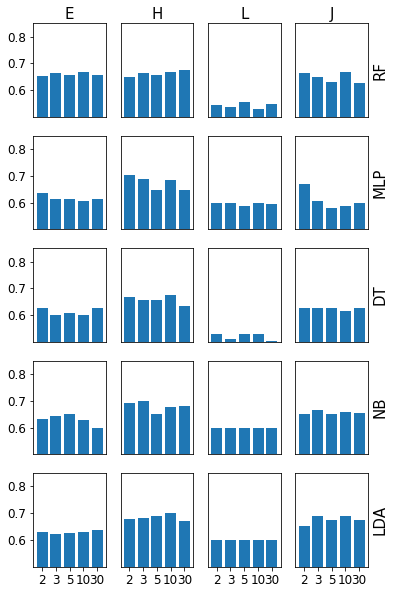

In [33]:
get_accuracy_bar_plots(df_tsne)

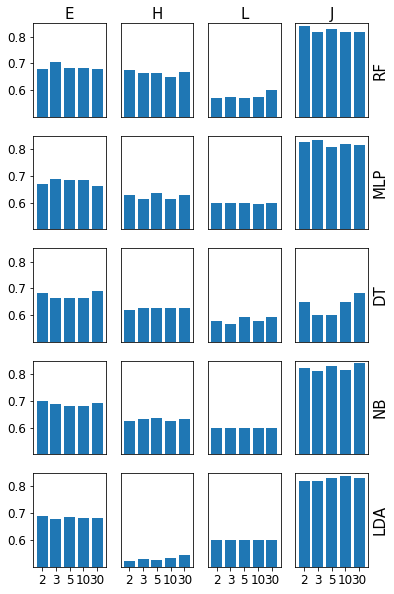

In [34]:
rows = convert_trajectories_to_rows(['pca'], ret_algs, sims)

df_pca = pd.DataFrame(rows, columns=['dim', 'alg', 'sim', 'acc'])

get_accuracy_bar_plots(df_pca)

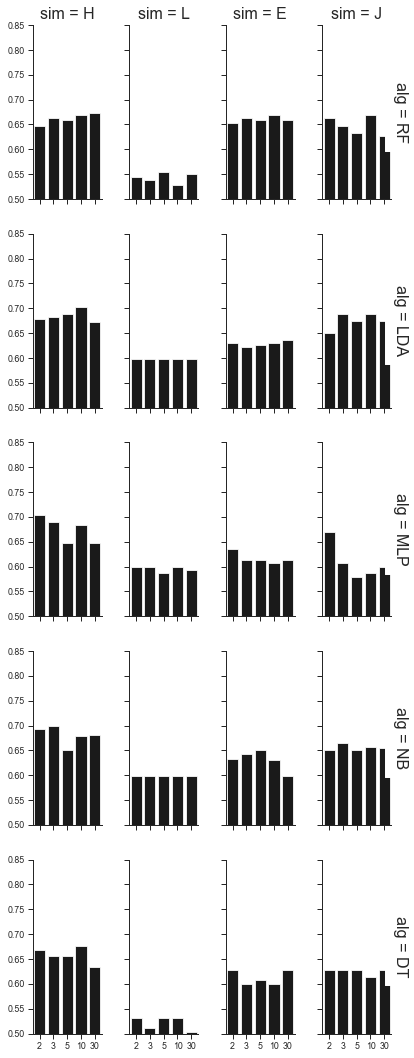

In [36]:
import numpy as np
import pandas

import seaborn as sns
sns.set(style='ticks') 
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":16})   


g = sns.catplot(y="acc", x="dim", row="alg", col="sim",
                data=df_tsne, saturation=.5,
                kind="bar", ci=None, orient='v', aspect=.5,
                margin_titles=True,
                height=3, color='k')

(g.set_axis_labels("", "")
  .set_xticklabels(cs)
  .set_titles("{col_name} | {row_name}")
  .set(ylim=(0.5, 0.85)))

plt.subplots_adjust(hspace=0.2, wspace=0.4)

plt.show()

In [37]:
rows = convert_trajectories_to_rows(['pca'], ret_algs, sims)

df_pca = pd.DataFrame(rows, columns=['dim', 'alg', 'sim', 'acc'])
df_pca

,dim,alg,sim,acc
0,2,RF,H,0.673575
1,3,RF,H,0.663212
2,5,RF,H,0.663212
3,10,RF,H,0.647668
4,30,RF,H,0.668394
...,...,...,...,...
95,2,DT,J,0.648276
96,3,DT,J,0.600000
97,5,DT,J,0.600000
98,10,DT,J,0.648276


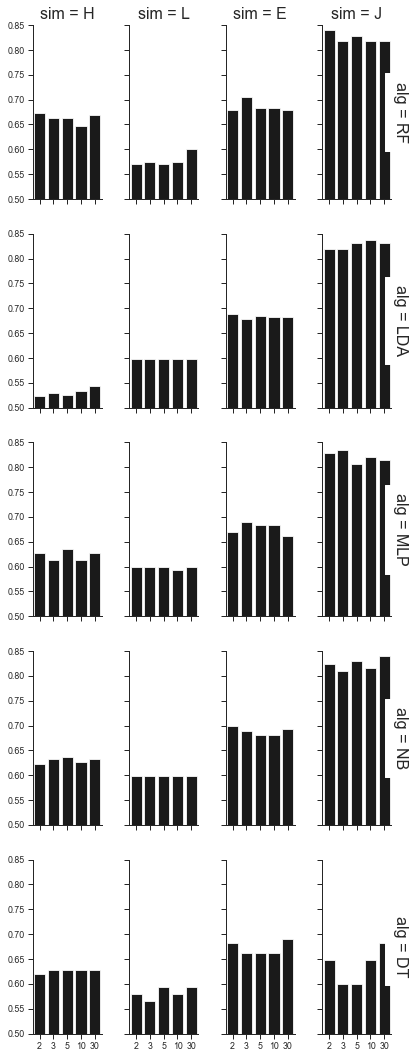

In [38]:
g = sns.catplot(y="acc", x="dim", row="alg", col="sim",
                data=df_pca, saturation=.5,
                kind="bar", ci=None, orient='v', aspect=.5,
                margin_titles=True,
                height=3, color='k')

(g.set_axis_labels("", "")
  .set_xticklabels(cs)
  .set_titles("{col_name} | {row_name}")
  .set(ylim=(0.5, 0.85)))

plt.subplots_adjust(hspace=0.2, wspace=0.4)

plt.show()

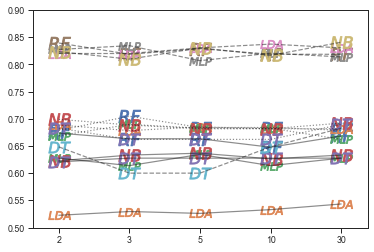

In [39]:
compare_trajectories(['pca'], ret_algs, ['hamming'],
                     alpha=.5)
compare_trajectories(['pca'], ret_algs, ['jaccard'],
                     linestyle='--', alpha=.5)
compare_trajectories(['pca'], ret_algs, ['levenshtein'],
                     linestyle=':', alpha=.5)
plt.ylim(0.5, 0.9)
plt.show()

In [40]:
result, names = trajectories_to_lists(['pca'], ret_algs, sims)

result_df = pd.DataFrame(np.array(result).T, columns=names, index=cs)
result_df

,Random_forest+hamming,Random_forest+length,Random_forest+levenshtein,Random_forest+jaccard,LDA+hamming,LDA+length,LDA+levenshtein,LDA+jaccard,MLP+hamming,MLP+length,MLP+levenshtein,MLP+jaccard,Naive_Bayes+hamming,Naive_Bayes+length,Naive_Bayes+levenshtein,Naive_Bayes+jaccard,Decision_tree+hamming,Decision_tree+length,Decision_tree+levenshtein,Decision_tree+jaccard
2,0.673575,0.569948,0.678756,0.839378,0.522491,0.598616,0.688581,0.820069,0.627586,0.600000,0.668966,0.827586,0.622837,0.598616,0.698962,0.823529,0.620690,0.579310,0.682759,0.648276
3,0.663212,0.575130,0.704663,0.818653,0.529412,0.598616,0.678201,0.820069,0.613793,0.600000,0.689655,0.834483,0.633218,0.598616,0.688581,0.809689,0.627586,0.565517,0.662069,0.600000
5,0.663212,0.569948,0.683938,0.829016,0.525952,0.598616,0.685121,0.830450,0.634483,0.600000,0.682759,0.806897,0.636678,0.598616,0.681661,0.830450,0.627586,0.593103,0.662069,0.600000
10,0.647668,0.575130,0.683938,0.818653,0.532872,0.598616,0.681661,0.837370,0.613793,0.593103,0.682759,0.820690,0.626298,0.598616,0.681661,0.816609,0.627586,0.579310,0.662069,0.648276
30,0.668394,0.601036,0.678756,0.818653,0.543253,0.598616,0.681661,0.830450,0.627586,0.600000,0.662069,0.813793,0.633218,0.598616,0.692042,0.840830,0.627586,0.593103,0.689655,0.682759


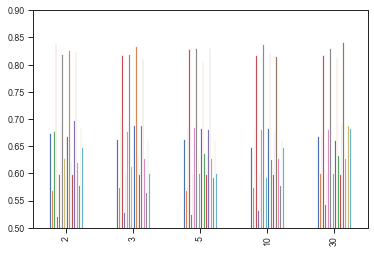

In [41]:
result_df.plot.bar(legend=False)
plt.ylim(0.5, 0.9)
plt.show()

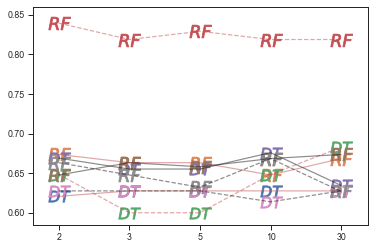

In [42]:
compare_trajectories(['pca'], ['Decision_tree', 'Random_forest'], ['hamming'],
                     alpha=.5, c='r')
compare_trajectories(['pca'], ['Decision_tree', 'Random_forest'], ['jaccard'],
                     linestyle='--', alpha=.5, c='r')
compare_trajectories(['tsne'], ['Decision_tree', 'Random_forest'], ['hamming'],
                     alpha=.5)
compare_trajectories(['tsne'], ['Decision_tree', 'Random_forest'], ['jaccard'],
                     linestyle='--', alpha=.5)
plt.show()